In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r2/title_r2_0.625k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 625 drug-target pairs
encoding drug...
unique drugs: 622
encoding protein...
unique target sequence: 320
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 51.7071. Total time 0.0 hours
Validation at Epoch 1 with loss:42.4512, MSE: 42.4512 , Pearson Correlation: -0.0349 with p-value: 7.88E-01 , Concordance Index: 0.48358
Training at Epoch 2 iteration 0 with loss 43.3305. Total time 0.00027 hours
Validation at Epoch 2 with loss:14.3717, MSE: 14.3717 , Pearson Correlation: -0.0171 with p-value: 8.95E-01 , Concordance Index: 0.49046
Training at Epoch 3 iteration 0 with loss 15.6630. Total time 0.00055 hours
Validation at Epoch 3 with loss:27.4804, MSE: 27.4804 , Pearson Correlation: 0.00105 with p-value: 9.94E-01 , Concordance Index: 0.48199
Training at Epoch 4 iteration 0 with loss 26.5462. Total time 0.00083 hours
Validation at Epoch 4 with loss:2.55086, MSE: 2.55086 , Pearson Correlation: -0.0002 with p-value: 9.98E-01 , Concordance Index: 0.49152
Training at Epoch 5 iteration 0 with loss 3.18162. Total time 0.00111 hours
Validation

Training at Epoch 39 iteration 0 with loss 1.81137. Total time 0.01083 hours
Validation at Epoch 39 with loss:1.67580, MSE: 1.67580 , Pearson Correlation: 0.10618 with p-value: 4.11E-01 , Concordance Index: 0.52489
Training at Epoch 40 iteration 0 with loss 2.05331. Total time 0.01111 hours
Validation at Epoch 40 with loss:1.70110, MSE: 1.70110 , Pearson Correlation: 0.10918 with p-value: 3.98E-01 , Concordance Index: 0.52542
Training at Epoch 41 iteration 0 with loss 1.98727. Total time 0.01138 hours
Validation at Epoch 41 with loss:1.71468, MSE: 1.71468 , Pearson Correlation: 0.11241 with p-value: 3.84E-01 , Concordance Index: 0.52621
Training at Epoch 42 iteration 0 with loss 1.88122. Total time 0.01166 hours
Validation at Epoch 42 with loss:1.68147, MSE: 1.68147 , Pearson Correlation: 0.11612 with p-value: 3.69E-01 , Concordance Index: 0.52542
Training at Epoch 43 iteration 0 with loss 2.14002. Total time 0.01194 hours
Validation at Epoch 43 with loss:1.66917, MSE: 1.66917 , Pearso

Validation at Epoch 77 with loss:1.56297, MSE: 1.56297 , Pearson Correlation: 0.27804 with p-value: 2.87E-02 , Concordance Index: 0.58792
Training at Epoch 78 iteration 0 with loss 1.60608. Total time 0.02222 hours
Validation at Epoch 78 with loss:1.57628, MSE: 1.57628 , Pearson Correlation: 0.28103 with p-value: 2.69E-02 , Concordance Index: 0.58686
Training at Epoch 79 iteration 0 with loss 1.52756. Total time 0.0225 hours
Validation at Epoch 79 with loss:1.54597, MSE: 1.54597 , Pearson Correlation: 0.28117 with p-value: 2.68E-02 , Concordance Index: 0.58368
Training at Epoch 80 iteration 0 with loss 1.55615. Total time 0.02277 hours
Validation at Epoch 80 with loss:1.56852, MSE: 1.56852 , Pearson Correlation: 0.28381 with p-value: 2.54E-02 , Concordance Index: 0.58739
Training at Epoch 81 iteration 0 with loss 1.43954. Total time 0.02305 hours
Validation at Epoch 81 with loss:1.55288, MSE: 1.55288 , Pearson Correlation: 0.28399 with p-value: 2.53E-02 , Concordance Index: 0.58527
Tra

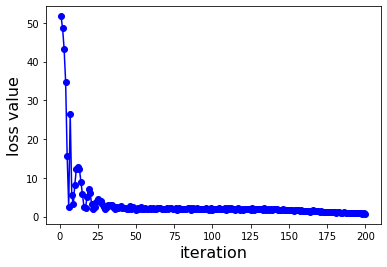

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r2/model_r2_0.625k_100epochs')